# Assignment 3

## Oluwanifemi Ajayi 201652476
### October 8, 2021

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('olympic_athletes.csv')

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Average height and weight for gold-medal winning men’s basketball teams at the summer Olympics

In [18]:
df1 = df[(df['Medal']=='Gold') & (df["Sport"]=='Basketball') & (df["Sex"]=='M')]
df1 = df1[['Year','Height','Weight']].groupby('Year').mean().reset_index().sort_values("Year", ascending=False)

Text(0.5, 0.98, "Average Olympic Men's Gold Basketball Teams")

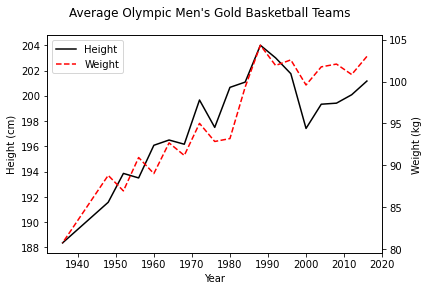

In [19]:
fig, ax=plt.subplots()

ax2 = ax.twinx()
x = df1['Year']
y2=df1['Weight']
y1=df1['Height']
l1=ax.plot(x,y1,'-k', label="Height")
l2=ax2.plot(x,y2,'--r', label="Weight")
l3=l1+l2

m=[l.get_label() for l in l3]
ax.legend(lns, m, loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Height (cm)')
ax2.set_ylabel('Weight (kg)')
fig.suptitle("Average Olympic Men's Gold Basketball Teams")


###  Top 10 highest medal-winning countries at the 2016 Olympics

In [23]:
df1=df[(df['Medal'].notna()) & (df['Year']==2016)]
df1=df1.drop_duplicates(subset=['Event','NOC','Medal'])
df1=df1[['NOC','Medal']].groupby('NOC').count().reset_index().sort_values("Medal", ascending=False)

df1=df1[:10]
countries=df1['NOC']

df2=df[(df['Year']==2016) & df.NOC.isin(countries)]
df2=df2.drop_duplicates(subset=['ID'])
df2=df2[['NOC','ID']].groupby('NOC').count().reset_index()
df1=df1.merge(df2, on='NOC')

Text(0.5, 0.98, '2016 Olympics Top 10 Medal Winning Countries')

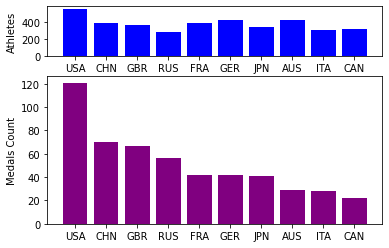

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1,3]})

ax1.bar(df1['NOC'], df1['ID'], color="blue")
ax2.bar(df1['NOC'], df1['Medal'], color="purple")
ax2.set_ylabel('Medals Count')
ax1.set_yticks([0,200,400])
ax1.set_ylabel('Athletes')
fig.suptitle("2016 Olympics Top 10 Medal Winning Countries")